In [10]:
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

PATH='dataset/electricity_data_all/*'
#Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')

In [11]:
month2rrp = defaultdict(list)
month2demand = defaultdict(list)

def get_day_month(day_str):
    day = day_str.split()[0]
    month = '/'.join(day.split('/')[:2])
    return day, month

for file in glob.glob(PATH):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        day, month = get_day_month(row['SETTLEMENTDATE'])        
        month2demand[month].append(row['TOTALDEMAND'])
        month2rrp[month].append(row['RRP'])    

In [14]:
months=[]; rrp=[]; demand=[]
for month in month2rrp.keys():
    months.append(month)
    rrp.append(np.sum(month2rrp[month]))
    demand.append(np.sum(month2demand[month]))

In [21]:
df = pd.DataFrame()
df['month']=months
df['rrp']=rrp
df['demand']=demand
df = df.sort_values(by=['month'],ignore_index=True)
df = df[df['month']>='2017-01']

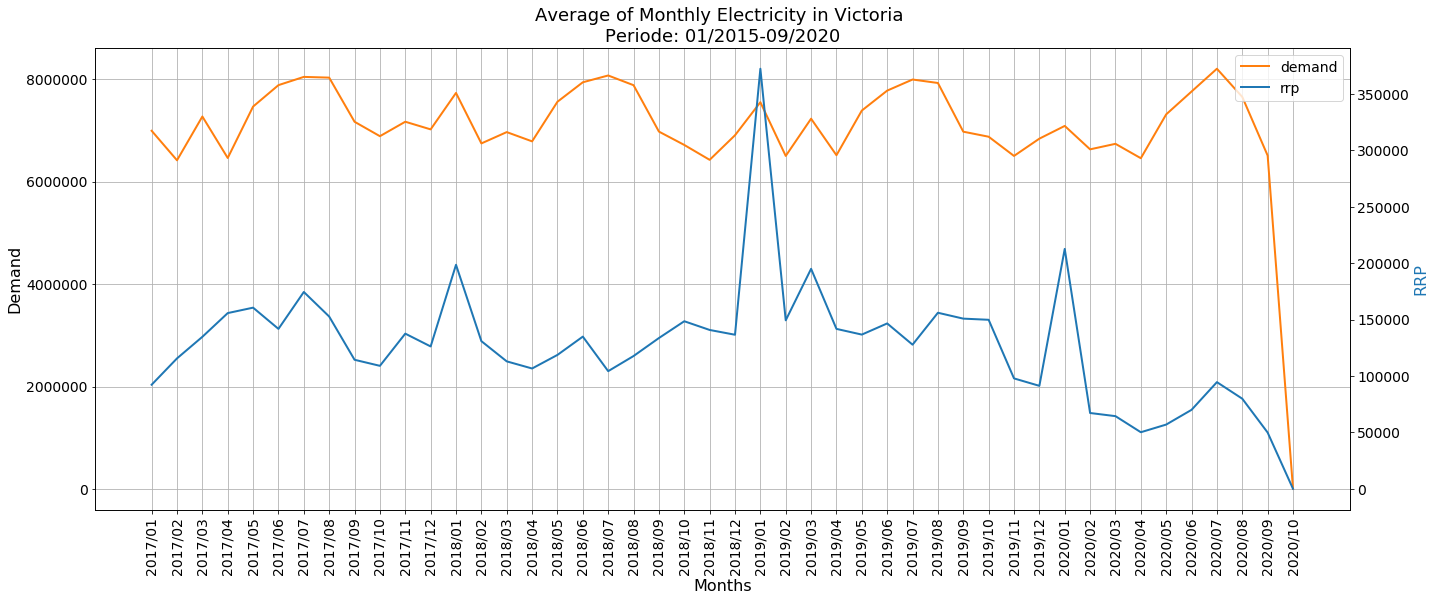

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(22.5, 8.5)
ax.grid()

plt.xticks(rotation=90)
ax.plot( 'month', 'demand', data=df, marker='', color='tab:orange', linewidth=2)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.tick_params(labelsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot( 'month', 'rrp', data=df, marker='', markerfacecolor='blue', color='tab:blue', linewidth=2)
ax2.set_ylabel("RRP",color="tab:blue",fontsize=16)
plt.tick_params(labelsize=14)

plt.title('Average of Monthly Electricity in Victoria \nPeriode: 01/2015-09/2020', fontsize=18)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, fontsize=14)
#fig.savefig("monthly_electricity.pdf", bbox_inches='tight')

In [88]:
months_2018=[]; demand_2018={}
months_2019=[]; demand_2019={}
months_2020=[]; demand_2020={}
for month in month2rrp.keys():
    if month.split('/')[1] >= '10':
        continue
    if '2018' in month:
        months_2018.append(month.split('/')[1])
        demand_2018[month.split('/')[1]] = (np.sum(month2demand[month]), np.std(month2demand[month]))
    elif '2019' in month:
        months_2019.append(month.split('/')[1])
        demand_2019[month.split('/')[1]] = (np.sum(month2demand[month]), np.std(month2demand[month]))
    elif '2020' in month:
        months_2020.append(month.split('/')[1])
        demand_2020[month.split('/')[1]] = (np.sum(month2demand[month]), np.std(month2demand[month]))

In [89]:
months_2018.sort()
months_2018

['01', '02', '03', '04', '05', '06', '07', '08', '09']

In [90]:
df = pd.DataFrame()
df['month']=months_2018
df['2018']=[demand_2018[a][0] for a in months_2018]
df['2019']=[demand_2019[a][0] for a in months_2019]
df['2020']=[demand_2020[a][0] for a in months_2020]
df['2018_st']=[demand_2018[a][1] for a in months_2018]
df['2019_st']=[demand_2019[a][1] for a in months_2019]
df['2020_st']=[demand_2020[a][1] for a in months_2020]

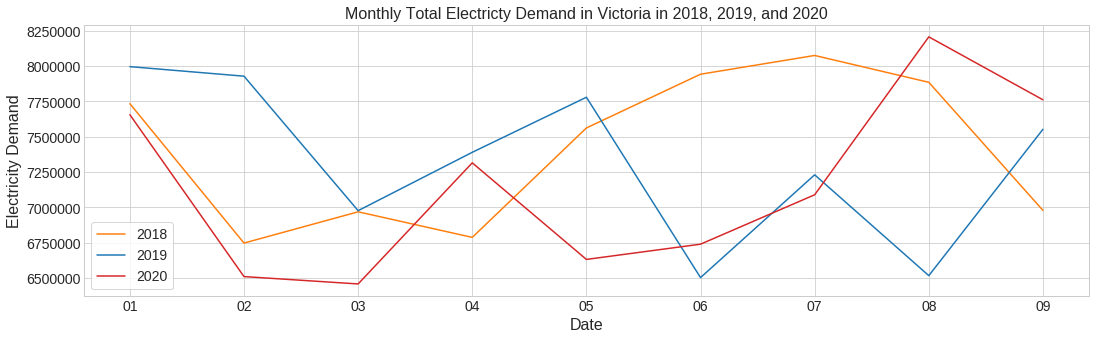

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

title = f'Monthly Total Electricty Demand in Victoria in 2018, 2019, and 2020'
fig = plt.figure(figsize=(18,5))
ax = plt.axes()

ax.plot(df['month'], df['2018'], color='tab:orange', label='2018')      # Grayscale between 0 and 1
ax.plot(df['month'], df['2019'], color='tab:blue', label='2019')   
ax.plot(df['month'], df['2020'], color='tab:red', label='2020')  # Grayscale between 0 and 1

#ax.fill_between(df['month'], df['2018']+df['2018_st'], df['2018']-df['2018_st'], facecolor='tab:orange', alpha=0.5)
#ax.fill_between(df['month'], df['2019']+df['2019_st'], df['2019']-df['2019_st'], facecolor='tab:blue', alpha=0.5)
#ax.fill_between(df['month'], df['2020']+df['2020_st'], df['2020']-df['2020_st'], facecolor='tab:red', alpha=0.5)

plt.title(title, fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Electricity Demand', fontsize=16)
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#ax.set_ylim(ymin=0)
#ax.set_ylim(ymax=0.4)
plt.legend(frameon=True, fontsize=14)
plt.tick_params(labelsize=14)
#fig.savefig("residual_daily_forecast_demand(7to7)-final.pdf", bbox_inches='tight')

In [72]:
df

,month,2018,2019,2020,2018_st,2019_st,2020_st
0,01,7733526.80,7995280.19,7655493.89,1152.132645,793.631903,848.663749
1,02,6747882.27,7927730.26,6510923.85,919.678560,813.028343,686.769091
2,03,6968875.89,6977003.92,6458852.78,640.653199,678.713306,632.575062
3,04,6788023.74,7389540.08,7315114.53,623.105461,759.174019,772.780114
4,05,7561653.79,7778882.93,6632281.92,750.638858,849.994013,731.544017
5,06,7941648.77,6503847.22,6740013.40,827.720498,920.690751,608.152378
6,07,8074243.00,7230454.55,7089386.86,819.254995,866.137092,1016.582909
7,08,7884509.47,6517588.48,8205829.99,785.383337,627.294490,832.982096
8,09,6978936.25,7552319.17,7760839.88,615.477357,1205.567782,866.647754


In [73]:
df['2018'].sum()

66679299.980000004

In [74]:
df['2019'].sum()

65872646.8

In [75]:
df['2020'].sum()

64368737.1

In [ ]:
Bulan 1-9
Total tahun 2018: 66.679.299
Total tahun 2019: 65.872.646
Total tahun 2020: 64.368.737